#Neural Network Classification with pytorch

In [90]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
# Split data into training and test sets
from sklearn.model_selection import train_test_split
import requests
from pathlib import Path



#Extra:we are importing a function to better visualize the working of our model


In [91]:


# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


#Getting data ready

In [92]:
#make classification data and get it ready

#no of samples
n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=42)



In [93]:
len(X),len(y)
type(X)

numpy.ndarray

In [94]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [95]:

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


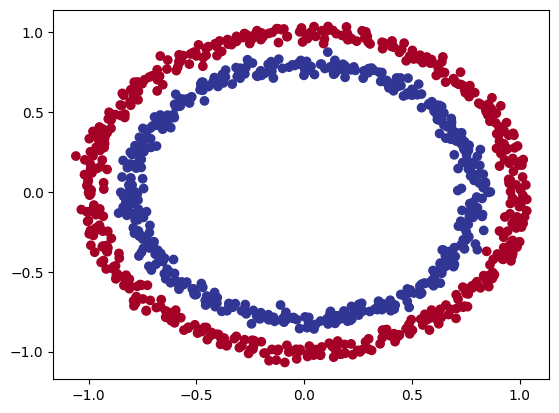

In [96]:
#visualization
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [98]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.device(), y.shape

TypeError: expected np.ndarray (got Tensor)

In [99]:
X.device

device(type='cpu')

In [100]:
#data splitting
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)

In [101]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [102]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Building a model

In [103]:
class modelv0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=5)
    self.layer2=nn.Linear(in_features=5,out_features=1)
  def forward(self,x):
    return self.layer2(self.layer1(x))

In [104]:
model0=modelv0()
model0

modelv0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [105]:
model0.to(device)
model0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427]])),
             ('layer1.bias',
              tensor([ 0.1554,  0.0910, -0.6231,  0.2968, -0.1061])),
             ('layer2.weight',
              tensor([[-0.2049,  0.3841,  0.0997, -0.2474, -0.2264]])),
             ('layer2.bias', tensor([-0.0214]))])

In [106]:
# Let's replicate the model above using nn.Sequential() /differnet approach
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [107]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

In [108]:
#lets try to test the model without training it and see what happen
with torch.inference_mode():
  untrain_prediction=model_0(X_test)
print(y_test,"\n",untrain_prediction[:10])

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.]) 
 tensor([[0.3265],
        [0.3140],
        [0.2919],
        [0.3365],
        [0.1853],
        [0.

In [109]:
#setting up an loss function and an optimizer for our model
loss_fn=nn.BCEWithLogitsLoss() #binary cross entropty
#optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## Train model

To train our model, we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)



##Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be raw logits.

We can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax().

In [128]:
#building a training and testing loop
def train_and_test(model,X_train,X_test,y_train,y_test,loss_fn,optimizer):
    torch.manual_seed(42)
    epochs = 10000
    for epoch in range(epochs):
    #TRAINING LOOP
      #model set to train mode
      model.train()
      #do the forward pass
      logits_ontrain=model(X_train).squeeze()  #get the raw output(logits)
      pred_ontrain=torch.round(torch.sigmoid(logits_ontrain))#convert the logits to probabilites [0,1] by applying the activation function on them
      #calculate the loss
      loss=loss_fn(logits_ontrain,y_train)
      # Optimizer zero grad
      optimizer.zero_grad()
      #loss backward
      loss.backward()
      #optimizer step
      optimizer.step()
    #TESTING LOOP
      #set model to testing mode
      model.eval()
      with torch.inference_mode():
        logists_ontest=model(X_test).squeeze()
        pred_ontest=torch.round(torch.sigmoid(logists_ontest))
        test_loss=loss_fn(logists_ontest,y_test)

      # Print out what's happenin'
      if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test loss: {test_loss:.5f}")#.5f is python formatting specifier used to only values until 5 decimal places
        # Plot decision boundary of the model
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(model, X_train, y_train)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(model, X_test, y_test)

Epoch: 0 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 1000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 2000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 3000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 4000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 5000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 6000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 7000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 8000 | Train Loss: 0.69298 | Test loss: 0.69466
Epoch: 9000 | Train Loss: 0.69298 | Test loss: 0.69466


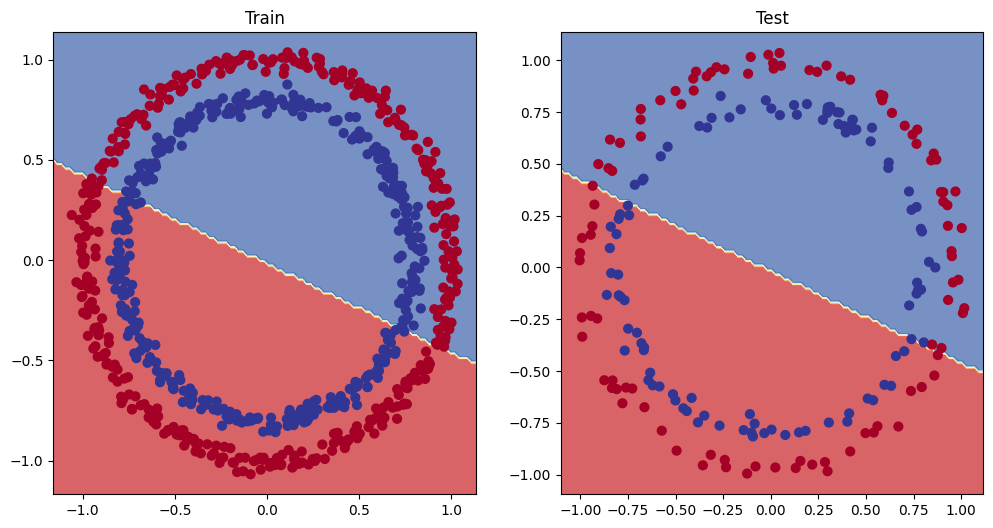

In [129]:
#calling our training and testing loop
train_and_test(model_0,X_train,X_test,y_train,y_test,loss_fn,optimizer)

## How to Improve  a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

#Making an improvised model by doing some changings

In [123]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),  # First linear layer
    nn.ReLU(),                                  # Activation function
    nn.Linear(in_features=10, out_features=10), # Second linear layer
    nn.ReLU(),                                  # Activation function
    nn.Linear(in_features=10, out_features=1)   # Output layer
)

model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0

In [124]:
#now again setting loss function and optimizer for our new model
# Create a loss function
loss_fn_1 = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer_1 = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

Epoch: 0 | Train Loss: 0.04176 | Test loss: 0.06583
Epoch: 1000 | Train Loss: 0.01672 | Test loss: 0.03363
Epoch: 2000 | Train Loss: 0.01048 | Test loss: 0.02451
Epoch: 3000 | Train Loss: 0.00765 | Test loss: 0.01993
Epoch: 4000 | Train Loss: 0.00603 | Test loss: 0.01726
Epoch: 5000 | Train Loss: 0.00499 | Test loss: 0.01557
Epoch: 6000 | Train Loss: 0.00428 | Test loss: 0.01451
Epoch: 7000 | Train Loss: 0.00375 | Test loss: 0.01374
Epoch: 8000 | Train Loss: 0.00333 | Test loss: 0.01317
Epoch: 9000 | Train Loss: 0.00300 | Test loss: 0.01273


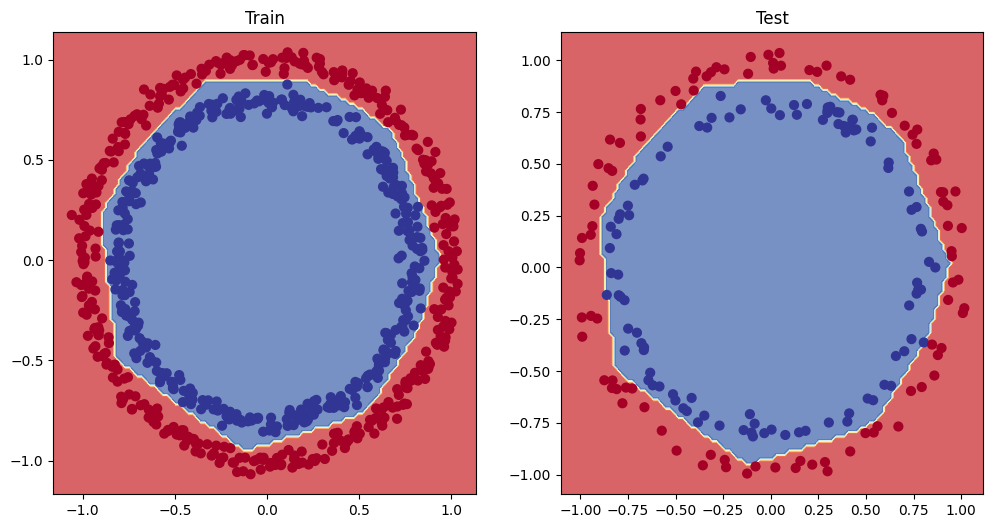

In [130]:
#now agian calling our training and testing loop
train_and_test(model_1,X_train,X_test,y_train,y_test,loss_fn_1,optimizer_1)

#As we can see our problem is solved,how did this happen?
when we added a relu into our model ,how it has helped us:

**Non-Linearity:** It allows the model to learn complex patterns, not just simple straight lines.

**Gradient Flow:** ReLU keeps gradients from getting too small, making it easier for the model to learn during training.

**Sparsity:** It activates only some neurons at a time (outputs 0 for negative inputs), which makes the model more efficient.

**Faster Learning:** ReLU often leads to quicker training because it helps the model explore solutions better.

In short, ReLU helps the model learn more effectively by enabling complexity, maintaining gradients, and improving efficiency.